## ***WIDHYA STOCK MARKET PRICE PREDICTION***

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
df=pd.read_csv('EOD-AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0


In [50]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
1085,2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
1086,2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
1087,2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
1088,2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
1089,2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0


#### ***EDA***

In [51]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [52]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,0.015642,1.005505,26.367551,26.578236,26.152043,26.373196,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,0.175122,0.181735,6.614490,6.640870,6.578682,6.616455,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,0.000000,1.000000,14.189776,14.561974,14.166335,14.258197,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,0.000000,1.000000,22.170235,22.433992,21.948836,22.201030,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,0.000000,1.000000,25.781510,26.055842,25.511496,25.789823,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,0.000000,1.000000,29.329099,29.541994,29.133958,29.362853,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,3.290000,7.000000,42.125703,42.628488,42.065561,42.440845,1.065523e+09


In [53]:
df.corr()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Open,1.000000,0.999948,0.999935,0.999866,-0.547597,0.088894,-0.019234,-0.534445,-0.537418,-0.531829,-0.534399,0.502054
High,0.999948,1.000000,0.999941,0.999944,-0.545893,0.088582,-0.019154,-0.535283,-0.538038,-0.532575,-0.534990,0.504125
Low,0.999935,0.999941,1.000000,0.999949,-0.550156,0.089065,-0.019259,-0.533844,-0.536724,-0.530960,-0.533517,0.498174
Close,0.999866,0.999944,0.999949,1.000000,-0.548315,0.088610,-0.019044,-0.534448,-0.537173,-0.531552,-0.533903,0.500617
Volume,-0.547597,-0.545893,-0.550156,-0.548315,1.000000,-0.061064,0.054382,0.085888,0.095572,0.071723,0.081938,0.337092
Dividend,0.088894,0.088582,0.089065,0.088610,-0.061064,1.000000,-0.002708,-0.050353,-0.051215,-0.050306,-0.051095,0.002395
Split,-0.019234,-0.019154,-0.019259,-0.019044,0.054382,-0.002708,1.000000,-0.024993,-0.024640,-0.025124,-0.023978,0.029564
Adj_Open,-0.534445,-0.535283,-0.533844,-0.534448,0.085888,-0.050353,-0.024993,1.000000,0.999528,0.999416,0.998987,-0.549990
Adj_High,-0.537418,-0.538038,-0.536724,-0.537173,0.095572,-0.051215,-0.024640,0.999528,1.000000,0.999278,0.999526,-0.544404
Adj_Low,-0.531829,-0.532575,-0.530960,-0.531552,0.071723,-0.050306,-0.025124,0.999416,0.999278,1.000000,0.999558,-0.560073


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1090 non-null   object 
 1   Open        1090 non-null   float64
 2   High        1090 non-null   float64
 3   Low         1090 non-null   float64
 4   Close       1090 non-null   float64
 5   Volume      1090 non-null   float64
 6   Dividend    1090 non-null   float64
 7   Split       1090 non-null   float64
 8   Adj_Open    1090 non-null   float64
 9   Adj_High    1090 non-null   float64
 10  Adj_Low     1090 non-null   float64
 11  Adj_Close   1090 non-null   float64
 12  Adj_Volume  1090 non-null   float64
dtypes: float64(12), object(1)
memory usage: 110.8+ KB


In [55]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [56]:
df.shape

(1090, 13)

In [57]:
df.count()

Date          1090
Open          1090
High          1090
Low           1090
Close         1090
Volume        1090
Dividend      1090
Split         1090
Adj_Open      1090
Adj_High      1090
Adj_Low       1090
Adj_Close     1090
Adj_Volume    1090
dtype: int64

In [58]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Dividend      float64
Split         float64
Adj_Open      float64
Adj_High      float64
Adj_Low       float64
Adj_Close     float64
Adj_Volume    float64
dtype: object

<AxesSubplot:>

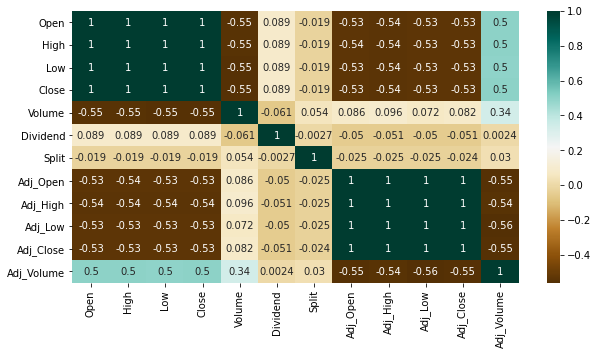

In [59]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

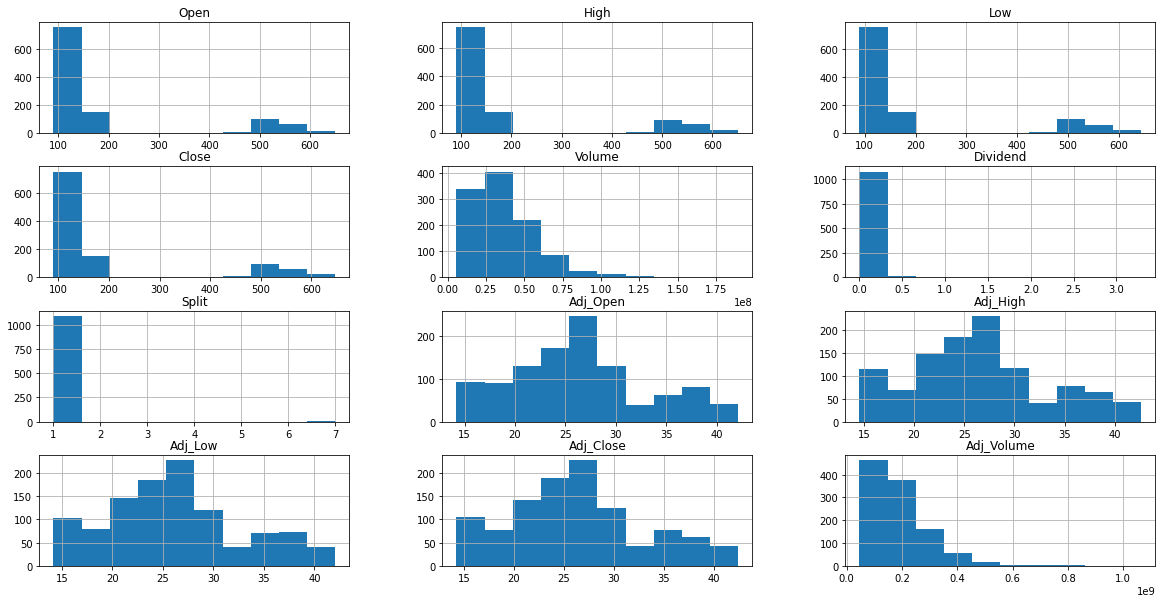

In [60]:
df.hist(figsize=(20,10))
plt.show()

In [61]:
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100.0
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100.0

In [62]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
HL_PCT        0
PCT_change    0
dtype: int64

In [48]:
df2=df
df2.head()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
0,41.156217,65920748.0,0.800795,0.046784
1,41.040745,85992852.0,0.627198,0.293945
2,41.033528,132742144.0,1.050009,-0.134660
3,42.101646,65397776.0,0.527970,0.188917
4,42.101646,83799584.0,1.097080,0.482287


In [63]:
df.fillna(-99999)

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
0,2017-12-28,171.00,171.850,170.480,171.080,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0,0.800795,0.046784
1,2017-12-27,170.10,170.780,169.710,170.600,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0,0.627198,0.293945
2,2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0,1.050009,-0.134660
3,2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0,0.527970,0.188917
4,2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0,1.097080,0.482287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683
1086,2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
1087,2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502
1088,2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0,1.195129,-0.173953


### ***MODEL BUILDING AND FITTING***

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [83]:
x=np.array(df[['Adj_Volume','HL_PCT','PCT_change']])
y=np.array(df[['Adj_Close']])

In [84]:
x.shape

(1090, 3)

In [85]:
y.shape

(1090, 1)

In [87]:
reg =LinearRegression()

In [88]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [89]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
line=reg.coef_*X_train+reg.intercept_

In [91]:
y_predict=reg.predict(X_test)
y_predict

array([[26.35835663],
       [29.2534911 ],
       [27.09168506],
       [23.95359138],
       [26.94823958],
       [29.54529247],
       [29.91152359],
       [26.14109231],
       [27.99402577],
       [29.31431825],
       [24.67457366],
       [27.42450915],
       [29.20409415],
       [22.39539115],
       [17.94715241],
       [27.30090635],
       [24.90838369],
       [25.20355886],
       [27.5948387 ],
       [30.2039877 ],
       [26.65970396],
       [29.71927208],
       [26.71605187],
       [23.6235063 ],
       [29.70588119],
       [29.61274591],
       [28.45155224],
       [26.04674429],
       [29.26897502],
       [23.42830912],
       [22.09999669],
       [30.17798409],
       [11.6260962 ],
       [21.65215878],
       [26.27364765],
       [28.17709446],
       [30.09146874],
       [28.08641628],
       [24.90715868],
       [25.77575878],
       [29.39678023],
       [29.00878147],
       [27.78612344],
       [25.89457638],
       [27.99808584],
       [24

In [93]:
dframe=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predict.flatten()})

In [94]:
dframe

,Actual,Predicted
0,27.793848,26.358357
1,31.259435,29.253491
2,22.390409,27.091685
3,27.223739,23.953591
4,23.029169,26.948240
...,...,...
213,26.962312,28.569586
214,37.029246,30.419335
215,32.461538,29.851446
216,29.161019,27.790874


In [98]:
import math

### ***ERROR EVALUATIONS***

In [100]:
print("Mean Absoulte Error:",mean_absolute_error(y_test,y_predict))
print("Mean Squared Error:",mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,y_predict)))

Mean Absoulte Error: 4.293813959715419
Mean Squared Error: 29.209100959396025
Root Mean Squared Error: 5.404544472885391


# ***THANK YOU!!!***